# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [3]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [4]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


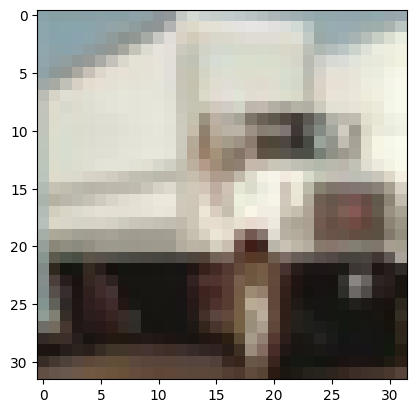

In [5]:
print(y_train[444])
plt.imshow(x_train[444]);

In [6]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [7]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [9]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [10]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

c:\Users\ADMIN\anaconda3\envs\gpuenv\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
1563/1563 [==============================] - 16s 7ms/step - loss: 1.7521 - accuracy: 0.3582 - val_loss: 1.4544 - val_accuracy: 0.4700
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4562 - accuracy: 0.4757 - val_loss: 1.4077 - val_accuracy: 0.5005
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3454 - accuracy: 0.5209 - val_loss: 1.1930 - val_accuracy: 0.5746
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2796 - accuracy: 0.5455 - val_loss: 1.2461 - val_accuracy: 0.5607
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2376 - accuracy: 0.5650 - val_loss: 1.1654 - val_accuracy: 0.5930
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2057 - accuracy: 0.5741 - val_loss: 1.1540 - val_accuracy: 0.5890
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1782 - accuracy: 0.5859 - val_loss: 1.1990 - val_ac

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [11]:
model_2 = Sequential()


# Conv #1
model_2.add(Conv2D(32, (5, 5), strides = 1, padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

# Conv #2
model_2.add(Conv2D(32, (5, 5), strides = 1))
model_2.add(Activation('relu'))

## MaxPool #1
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# Conv #3
model_2.add(Conv2D(32, (5, 5), strides = 1))
model_2.add(Activation('relu'))

# Conv #4
model_2.add(Conv2D(32, (5, 5), strides = 1))
model_2.add(Activation('relu'))

# MaxPool #2
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 32)        0         
                                                      

### Number of parameters of model_2 is 232,426 while model_1 has 181,162 total number of parameters

In [13]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

hist_2 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

c:\Users\ADMIN\anaconda3\envs\gpuenv\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4803 - accuracy: 0.4630 - val_loss: 1.2633 - val_accuracy: 0.5361
Epoch 2/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2669 - accuracy: 0.5487 - val_loss: 1.2117 - val_accuracy: 0.5599
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1430 - accuracy: 0.5980 - val_loss: 1.4419 - val_accuracy: 0.5358
Epoch 4/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0676 - accuracy: 0.6263 - val_loss: 0.9506 - val_accuracy: 0.6670
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0191 - accuracy: 0.6462 - val_loss: 0.9437 - val_accuracy: 0.6725


The training time per epoch is 15 seconds. The average loss for the training data is around 1.2, while the validation data has an average loss of around 1.2. Regarding accuracy, the validation data performs better than the training data. It starts at 0.5361 on the first epoch and increases to 0.6725 on the last epoch. In comparison, the training data starts at 0.4630 and increases to 0.6462 on the last epoch. However, these results from both the training and validation data suggest that the model's performance might not be optimal.

In [15]:
model_3 = Sequential()

# Convolutional Layer
model_3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
# Pooling layer
model_3.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model_3.add(Dropout(0.25))

model_3.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
# model_3.add(Dropout(0.2))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(10, activation='softmax'))

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [16]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

hist_3 = model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=20,
              validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 24s 14ms/step - loss: 1.5428 - accuracy: 0.4535 - val_loss: 1.5033 - val_accuracy: 0.5029
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1198 - accuracy: 0.6140 - val_loss: 0.9662 - val_accuracy: 0.6740
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9739 - accuracy: 0.6680 - val_loss: 0.8971 - val_accuracy: 0.7107
Epoch 4/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9024 - accuracy: 0.6964 - val_loss: 0.8405 - val_accuracy: 0.7205
Epoch 5/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8358 - accuracy: 0.7189 - val_loss: 0.8050 - val_accuracy: 0.7421
Epoch 6/20
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7933 - accuracy: 0.7365 - val_loss: 0.8426 - val_accuracy: 0.7306
Epoch 7/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7429 - accuracy: 0.7515 - val_loss: 0.8640 -

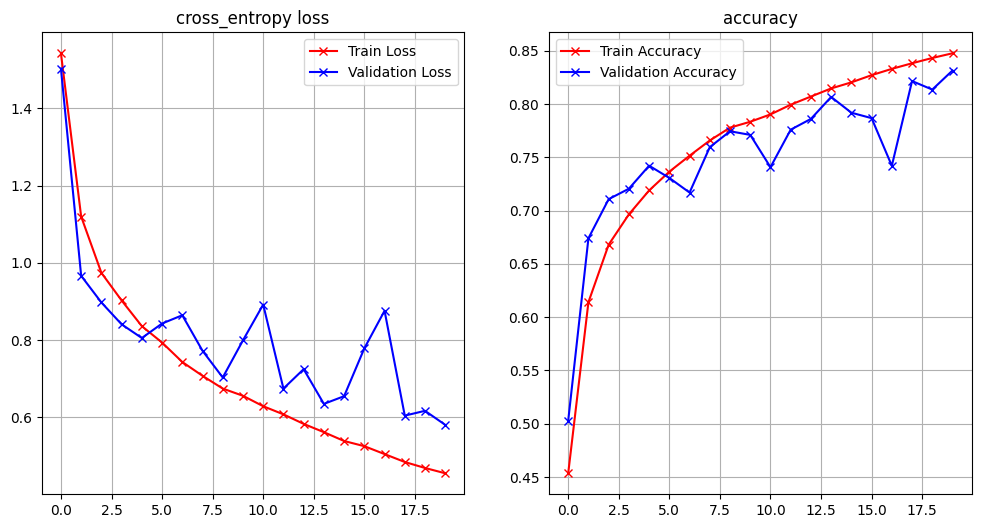

In [18]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(hist_3)

#### Conclusion

In this activity, I learned about how convolutional neural networks (CNNs) function and their usefulness in image detection. I also gained experience in building and training CNNs. CNNs are powerful tools because they can automatically learn features from data, making them highly valuable for a wide range of applications in computer vision.